## What are Data Types?

Data types represent the kind of value a variable can hold (e.g., integers, floats, strings).

Common data types in Pandas:

- Integer (int): Whole numbers.
- Float (float): Decimal numbers.
- String (object): Text data.
- Boolean (bool): True/False values.
- Datetime (datetime64): Date and time data.


## Why is Data Type Conversion Important?

- Ensures that data is in the correct format for analysis and calculations.
- Facilitates operations like sorting, filtering, and aggregating data.
- Prevents errors in functions that expect specific data types.

In [1]:
import pandas as pd

url = 'https://github.com/9meo/bas240/raw/main/data/customer_shopping_data.csv'

df = pd.read_csv(url)


## Checking Data Types

Using dtypes

Display the data types of each column in a DataFrame.

Usage:

```python
df.dtypes
```

In [2]:
df.dtypes

,0
invoice_no,object
customer_id,object
gender,object
age,int64
category,object
quantity,int64
price,float64
payment_method,object
invoice_date,object
shopping_mall,object


In [4]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


**Converting Data Types**

Using **astype()**

Convert a column to a different data type.

Usage:
```python
df['column_name'] = df['column_name'].astype(new_data_type)
```

In [6]:
#Example:

# Convert Quantity to integer:

df['quantity'] = df['quantity'].astype(int)


In [7]:
#Check 'quantity' datatype
df.dtypes

,0
invoice_no,object
customer_id,object
gender,object
age,int64
category,object
quantity,int64
price,float64
payment_method,object
invoice_date,object
shopping_mall,object


**Converting Strings to Numeric**

Using **pd.to_numeric()**

Convert strings to numeric values (e.g., converting prices stored as strings to floats).

Usage:
```python
df['TotalAmount'] = pd.to_numeric(df['TotalAmount'], errors='coerce')
```

Handling Errors: The **errors='coerce'** argument converts invalid parsing to NaN (missing data).

**Converting Strings to Datetime**

Using pd.to_datetime()

Convert a string column to datetime format for date and time operations.

Usage:
```python
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')
```

In [8]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

In [11]:
df.dtypes

,0
invoice_no,object
customer_id,object
gender,object
age,int64
category,object
quantity,int64
price,float64
payment_method,object
invoice_date,datetime64[ns]
shopping_mall,object


##  Quantitative vs. Qualitative

Create the Sample Dataset:

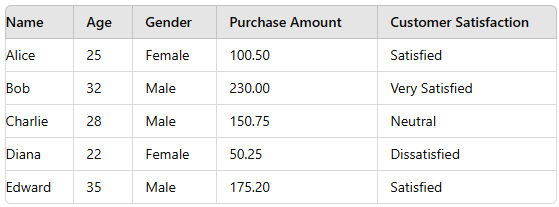





In [16]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Edward'],
    'Age': [25, 32, 28, 22, 35],
    'Gender': ['Female', 'Male', 'Male', 'Female', 'Male'],
    'Purchase Amount': [100.50, 230.00, 150.75, 50.25, 175.20],
    'Customer Satisfaction': ['Satisfied', 'Very Satisfied', 'Neutral', 'Dissatisfied', 'Satisfied']
}

df = pd.DataFrame(data)
df


,Name,Age,Gender,Purchase Amount,Customer Satisfaction
0,Alice,25,Female,100.50,Satisfied
1,Bob,32,Male,230.00,Very Satisfied
2,Charlie,28,Male,150.75,Neutral
3,Diana,22,Female,50.25,Dissatisfied
4,Edward,35,Male,175.20,Satisfied


In [18]:
# categorize each column as either quantitative or qualitative.

df['Age'].value_counts()

,count
Age,
25,1
32,1
28,1
22,1
35,1


In [19]:
df['Gender'].value_counts()

,count
Gender,
Male,3
Female,2


## Review the columns in the dataset and categorize each column as either quantitative or qualitative. Use a Markdown cell to list your classifications.

**Quantitative Data**:

- Age
-

**Qualitative Data**:
- Gender
-

## Analyze Quantitative Data:

For the quantitative columns you identified, calculate basic statistics like the mean, median, and standard deviation.

In [20]:
df['Age'].mean()  # Example for calculating mean

28.4

In [21]:
df['Purchase Amount'].median()  # Example for calculating median

150.75

In [22]:
df['Age'].std()  # Example for calculating standard deviation

5.224940191045253

<Axes: >

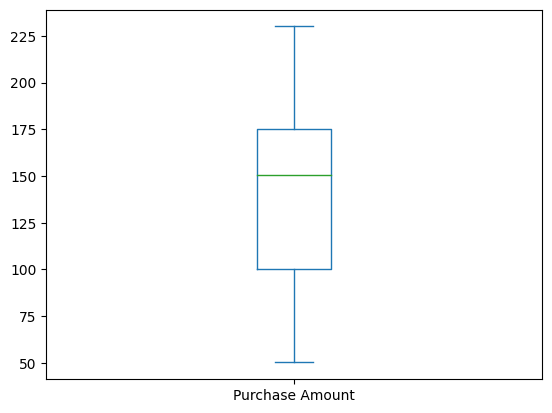

In [25]:
df['Purchase Amount'].plot(kind='box')

## Analyze Qualitative Data:

For the qualitative columns, calculate the frequency of each category using **value_counts()**.





In [23]:
df['Gender'].value_counts()  # Example for counting categories


,count
Gender,
Male,3
Female,2


<Axes: xlabel='Customer Satisfaction'>

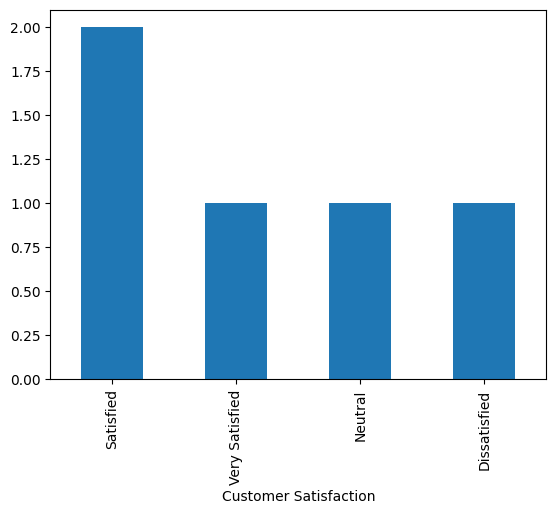

In [24]:
df['Customer Satisfaction'].value_counts().plot(kind='bar')


## Categorical Variables

**What are Categorical Variables?**

- Categorical variables represent categories or labels, often qualitative data, such as Gender and Customer Satisfaction.
- They can be Nominal (no inherent order) or Ordinal (with a meaningful order).

**Why Do We Need to Encode Categorical Variables?**

- Many machine learning models and algorithms work with numerical data, so converting categorical variables into numerical form is essential.
- Proper encoding allows models to interpret and process categorical information correctly.



### Methods for Encoding Categorical Variables

**Label Encoding**

- Converts each category to a unique integer.
- Best for ordinal data where the order of categories matters.

In [27]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Gender_Encoded'] = encoder.fit_transform(df['Gender'])
df

,Name,Age,Gender,Purchase Amount,Customer Satisfaction,Gender_Encoded
0,Alice,25,Female,100.50,Satisfied,0
1,Bob,32,Male,230.00,Very Satisfied,1
2,Charlie,28,Male,150.75,Neutral,1
3,Diana,22,Female,50.25,Dissatisfied,0
4,Edward,35,Male,175.20,Satisfied,1


- Original Categories: Female, Male
- Encoded Values: 0, 1

  **Result:**

  ```
  | Name    | Gender | Gender_Encoded |
  |---------|--------|----------------|
  | Alice   | Female | 0              |
  | Bob     | Male   | 1              |
  | Charlie | Male   | 1              |
  | Diana   | Female | 0              |
  | Edward  | Male   | 1              |
  ```




## Write a brief summary (1-2 paragraphs) comparing the insights gained from the quantitative data vs. the qualitative data.

Consider questions like:

- What trends or patterns did you observe in the quantitative data?
- How does the qualitative data help you understand customer preferences or behavior?

# Assignment 3: Data Types and Basic Analysis

## Course Information
- **Course**: BAS 240 - Business Analytics  
- **Topic**: Data Types, Conversion, and Basic Analysis
- **Based on**: Lab 2 - Data Types & Conversion
- **Estimated Time**: 60-90 minutes
- **Points**: 100 points

## Learning Objectives
By the end of this assignment, you will be able to:
1. Check and identify data types in a dataset
2. Convert data types appropriately using pandas functions
3. Distinguish between quantitative and qualitative data
4. Perform basic statistical analysis for different data types
5. Apply basic categorical encoding techniques

---

## Part 1: Data Loading and Type Checking (20 points)

### Task 1: Load Dataset and Check Data Types (10 points)
```python
import pandas as pd

# Load the dataset
url = 'https://github.com/9meo/bas240/raw/main/data/customer_shopping_data.csv'
df = pd.read_csv(url)
```

**Answer the following:**

**a)** Display the first 5 rows of the dataset

**b)** Check the data types of all columns using `df.dtypes`

**c)** What data type is the `invoice_date` column currently stored as?

### Task 2: Data Type Issues (10 points)

**a)** Look at the `invoice_date` column. What should this column's data type be?

**b)** Are there any other columns that might need data type conversion? List them and explain why.

---

## Part 2: Data Type Conversion (25 points)

### Task 3: Convert Date Column (10 points)
Following the example from Lab 2:

**a)** Convert the `invoice_date` column to datetime format using `pd.to_datetime()`

**b)** Verify the conversion worked by checking `df.dtypes` again

**c)** Show the first 5 values of the converted date column

### Task 4: Handle Numeric Conversions (10 points)

**a)** Check if any numeric columns (like `price` or `quantity`) need conversion using `pd.to_numeric()`

**b)** If needed, apply the conversion with `errors='coerce'` parameter

**c)** Explain what the `errors='coerce'` parameter does

### Task 5: Type Conversion Practice (5 points)

Convert the `age` column to integer type using `astype(int)` and verify the conversion.

---

## Part 3: Quantitative vs Qualitative Classification (20 points)

### Task 6: Data Classification (20 points)
Based on the Lab 2 content, classify each column as either **Quantitative** or **Qualitative**:

**Complete the table below:**

| Column Name | Quantitative or Qualitative | Reasoning |
|-------------|------------------------------|-----------|
| invoice_no | | |
| customer_id | | |
| gender | | |
| age | | |
| category | | |
| quantity | | |
| price | | |
| payment_method | | |
| invoice_date | | |
| shopping_mall | | |

**Remember:**
- **Quantitative**: Numbers that can be measured or counted (like age, price)
- **Qualitative**: Categories or labels (like gender, colors)

---

## Part 4: Basic Analysis for Quantitative Data (15 points)

### Task 7: Calculate Basic Statistics (15 points)
For the quantitative columns you identified above, calculate:

**a)** Mean using `.mean()`
**b)** Median using `.median()`  
**c)** Standard deviation using `.std()`

**Format your answer like this example:**
```
Age Statistics:
- Mean: ___
- Median: ___
- Standard Deviation: ___
```

Do this for all quantitative columns.

---

## Part 5: Basic Analysis for Qualitative Data (15 points)

### Task 8: Frequency Analysis (10 points)
For the qualitative columns, use `value_counts()` to find:

**a)** The frequency distribution of `gender`
**b)** The frequency distribution of `category`

**Example format:**
```
Gender Distribution:
Male: ___
Female: ___
```

### Task 9: Basic Visualization (5 points)
Create a simple bar chart for one of your qualitative variables using:
```python
df['column_name'].value_counts().plot(kind='bar')
```

---

## Part 6: Basic Categorical Encoding (5 points)

### Task 10: Apply Label Encoding (5 points)
Following the Lab 2 example:

**a)** Import `LabelEncoder` from `sklearn.preprocessing`

**b)** Apply label encoding to the `gender` column

**c)** Show the mapping (which gender becomes 0 and which becomes 1)

**d)** Display the first 5 rows showing both original and encoded gender columns

---

## Part 7: Written Summary

### Task 11: Analysis Summary (15 points)
Write a short summary (200-300 words) answering:

**Quantitative Data Analysis:**
- What did you learn about the customers from the numerical data (age, price, quantity)?
- Which quantitative variable shows the most variation (highest standard deviation)?

**Qualitative Data Analysis:**  
- What are the most common categories in your qualitative variables?
- How could this categorical information help a business make decisions?

**Data Type Conversion:**
- Why was converting the date column important?
- What problems could occur if data types are incorrect?

---

## Submission Requirements

### What to Submit:
1. **Jupyter Notebook (.ipynb)** with:
   - All completed tasks and code
   - All outputs visible
   - Your written summary

2. **Screenshots** of key outputs if PDF export doesn't work

### File Naming:
- `LastName_FirstName_Assignment3.ipynb`

---

## Grading Rubric

| Component | Points | What We're Looking For |
|-----------|--------|------------------------|
| Data Type Checking | 20 | Correctly identify current data types and issues |
| Data Type Conversion | 25 | Properly convert dates and handle numeric data |
| Data Classification | 20 | Correctly classify quantitative vs qualitative with reasoning |
| Quantitative Analysis | 15 | Accurate calculation of mean, median, standard deviation |
| Qualitative Analysis | 15 | Proper use of value_counts() and basic visualization |
| Categorical Encoding | 5 | Successful application of label encoding |
| **Total** | **100** | |

---

## Resources from Lab 2

### Key Functions You Should Use:
- `df.dtypes` - Check data types
- `pd.to_datetime()` - Convert to datetime
- `pd.to_numeric()` - Convert to numeric  
- `df.astype()` - Convert data types
- `df.value_counts()` - Count categories
- `df.mean()`, `df.median()`, `df.std()` - Basic statistics
- `LabelEncoder()` - Encode categories

### Remember from Lab 2:
- Data types represent the kind of value a variable can hold
- Proper data types are important for analysis and calculations
- `errors='coerce'` converts invalid parsing to NaN
- Label encoding converts categories to numbers (0, 1, 2, ...)

---
